<a href="https://colab.research.google.com/github/chethan6829/chethan6829/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file created successfully!

Dataset Preview:
    Age  MonthlyIncome              Department  JobSatisfaction  \
0   25          30000                   Sales                2   
1   30          45000  Research & Development                3   
2   45          80000                      HR                4   
3   28          35000                   Sales                1   
4   35          60000  Research & Development                3   

   YearsAtCompany Attrition  
0               1       Yes  
1               3        No  
2              10        No  
3               2       Yes  
4               5        No   



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.3333333333333333

Confusion Matrix:
 [[1 1]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3


Overall Attrition Rate: 40.00%


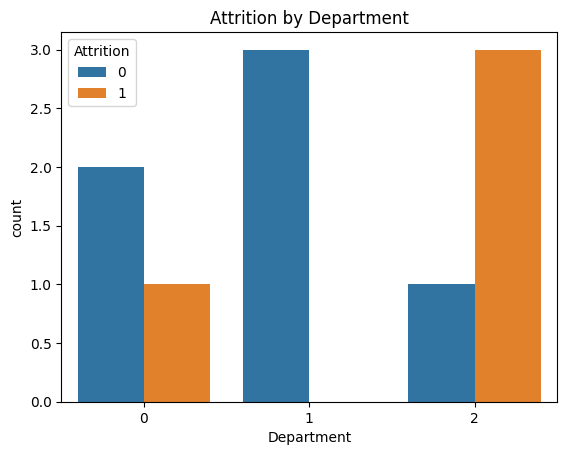

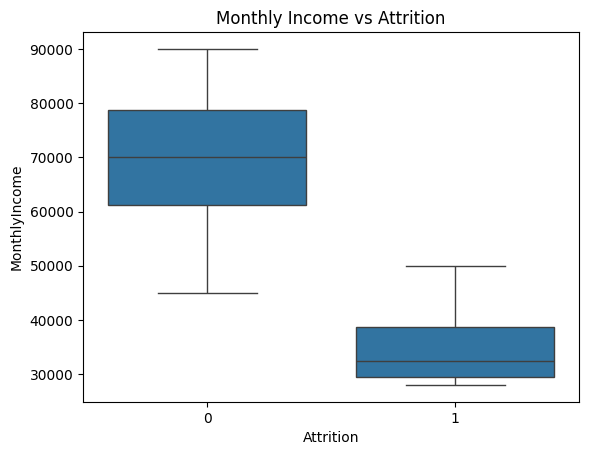

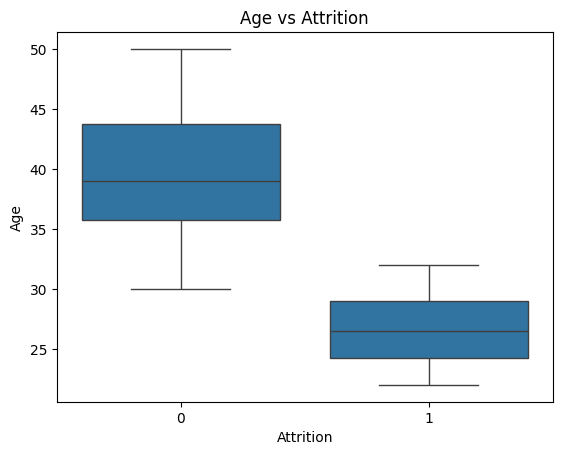

In [1]:
# ================================
# Employee Attrition Analysis
# End-to-End Single Script
# ================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ================================
# STEP 1: CREATE HR ATTRITION CSV
# ================================

data = {
    "Age": [25, 30, 45, 28, 35, 40, 22, 50, 32, 38],
    "MonthlyIncome": [30000, 45000, 80000, 35000, 60000, 75000, 28000, 90000, 50000, 65000],
    "Department": [
        "Sales", "Research & Development", "HR", "Sales",
        "Research & Development", "Sales", "HR",
        "Research & Development", "Sales", "HR"
    ],
    "JobSatisfaction": [2, 3, 4, 1, 3, 2, 1, 4, 2, 3],
    "YearsAtCompany": [1, 3, 10, 2, 5, 8, 1, 15, 4, 6],
    "Attrition": ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No"]
}

df = pd.DataFrame(data)
df.to_csv("HR_Attrition.csv", index=False)

print("CSV file created successfully!\n")

# ================================
# STEP 2: LOAD DATA
# ================================

df = pd.read_csv("HR_Attrition.csv")
print("Dataset Preview:\n", df.head(), "\n")

# ================================
# STEP 3: DATA ENCODING
# ================================

le = LabelEncoder()
df["Department"] = le.fit_transform(df["Department"])
df["Attrition"] = le.fit_transform(df["Attrition"])

# ================================
# STEP 4: FEATURE SELECTION
# ================================

X = df[["Age", "MonthlyIncome", "Department", "JobSatisfaction", "YearsAtCompany"]]
y = df["Attrition"]

# ================================
# STEP 5: TRAIN-TEST SPLIT
# ================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ================================
# STEP 6: CLASSIFICATION MODEL
# ================================

model = LogisticRegression()
model.fit(X_train, y_train)

# ================================
# STEP 7: PREDICTION & EVALUATION
# ================================

y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ================================
# STEP 8: HR KPIs
# ================================

attrition_rate = df["Attrition"].mean() * 100
print(f"\nOverall Attrition Rate: {attrition_rate:.2f}%")

# ================================
# STEP 9: HR DASHBOARD VISUALS
# ===============================

plt.figure()
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition by Department")
plt.show()

plt.figure()
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

plt.figure()
sns.boxplot(x="Attrition", y="Age", data=df)
plt.title("Age vs Attrition")
plt.show()